In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
%matplotlib inline
DBNAME = "king_county_housing_prices"
conn = psycopg2.connect(dbname=DBNAME)

In [2]:
data = pd.read_csv('../asp_original')
data.head()

,Unnamed: 0,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,...,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances
0,0,2019-06-26,775000.0,11,6,3,N,N,1,8,...,0,0,0,N,N,0.0,0,0,0,N
1,1,2019-07-01,1410000.0,11,6,3,N,N,1,8,...,0,0,0,N,N,0.0,0,0,0,N
2,2,2019-06-25,460000.0,11,6,3,N,N,1,8,...,0,0,0,N,N,0.0,0,1,0,N
3,3,2019-10-30,484000.0,11,6,3,N,N,1,8,...,0,0,0,N,N,0.0,0,2,0,N
4,4,2019-06-12,1000000.0,11,6,3,N,N,1,8,...,0,0,0,N,N,0.0,0,1,0,N


In [3]:
data.shape

(16386, 65)

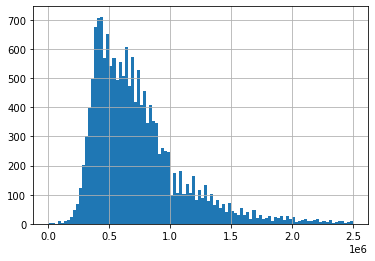

In [4]:
data['saleprice'].hist(bins=100)

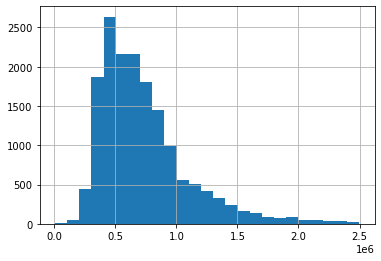

In [5]:
data['saleprice'].hist(bins=25);

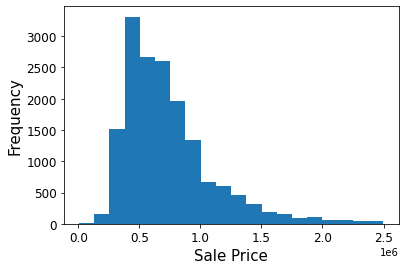

In [6]:
data['saleprice'].hist(bins=20, grid = False, xlabelsize = 12, ylabelsize = 12)
plt.xlabel('Sale Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

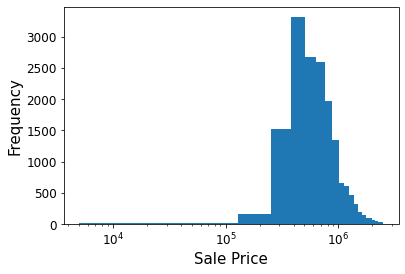

In [7]:
data['saleprice'].hist(bins=20, grid = False, xlabelsize = 12, ylabelsize = 12)
plt.xlabel('Sale Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xscale('log');

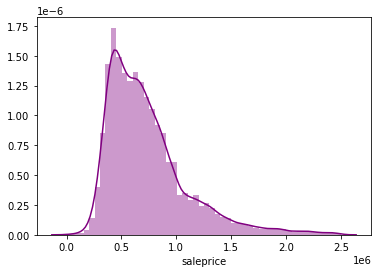

In [8]:
sns.distplot(data['saleprice'], kde = True, color = 'purple');

In [9]:
data['propertytype'].unique

<bound method Series.unique of 0        11
1        11
2        11
3        11
4        11
         ..
16381    11
16382    11
16383    11
16384    11
16385    11
Name: propertytype, Length: 16386, dtype: int64>

In [10]:
data.propertytype.value_counts()

11    16182
12      108
14       83
18       13
Name: propertytype, dtype: int64

/opt/anaconda3/envs/amanda/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


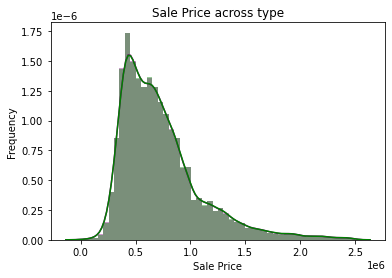

In [11]:
type11 = data[data.propertytype == 11]
sns.distplot(type11['saleprice'], kde = True, color = 'purple')
other = data[data.propertytype != '11']
sns.distplot(other['saleprice'], kde = True, color = 'green')
plt.title('Sale Price across type')
plt.xlabel('Sale Price')
plt.ylabel('Frequency');

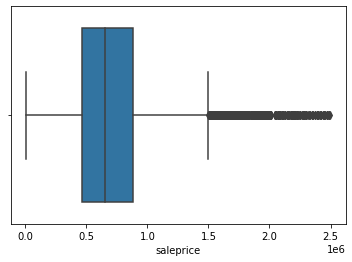

In [12]:
sns.boxplot(data.saleprice)

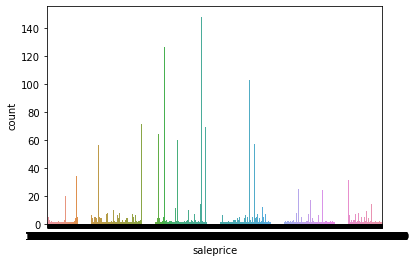

In [13]:
sns.countplot(data.saleprice)

In [14]:
data.columns

Index(['Unnamed: 0', 'documentdate', 'saleprice', 'propertytype',
       'principaluse', 'saleinstrument', 'currentuseland', 'historicproperty',
       'salereason', 'propertyclass', 'zipcode', 'streettype', 'stories',
       'buildinggrade', 'squarefeettotalliving', 'squarefeettotalbasement',
       'squarefeetgarageattached', 'squarefeetopenporch',
       'squarefeetenclosedporch', 'squarefeetdeck', 'bedrooms',
       'bathhalfcount', 'bath3qtrcount', 'bathfullcount',
       'fireplacesinglestory', 'fireplacemultiplestory',
       'fireplacefreestanding', 'fireplaceadditional', 'yearbuilt',
       'yearrenovated', 'percentcomplete', 'obsolescence',
       'percentnetcondition', 'condition', 'township', 'propertytype.1',
       'districtname', 'levycode', 'lotsquarefootage', 'watersystem', 'access',
       'topography', 'viewmtranier', 'viewolympics', 'viewcascades',
       'viewterritorial', 'viewseattleskyline', 'viewpugetsound',
       'viewlakewashington', 'viewlakesammamish', 'vi

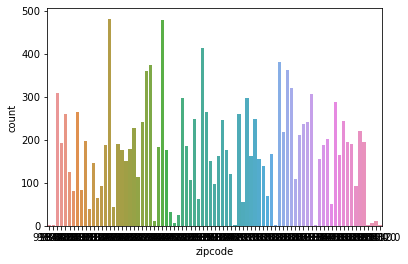

In [15]:
sns.countplot(data.zipcode)